In [2]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import skimage as ski
from skimage.feature import hog
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import json

import time
from datetime import timedelta
import math

import h5py

%matplotlib inline

/Users/Aidan/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Load Data

In [3]:
d_train = h5py.File('./train_m_28/train_2.h5', 'r')
#d_test = h5py.File('./img28_bw/test_28_bw.h5', 'r')
d_val = h5py.File('./train_m_28/validation_1.h5', 'r')

In [4]:
Xtrain = d_train['train']['images']
ytrain = d_train['train']['labels']

#Xtest = d_test['test']['images']

Xval = d_val['validation']['images']
yval = d_val['validation']['labels']

# if we also have test
# print(\
# 'Training samples:\t{}\n\
# Test samples:\t\t{}\n\
# Validation Samples:\t{}'.format(Xtrain.shape[0], Xtest.shape[0], Xval.shape[0]))

#no test 
print(\
'Training samples:\t{}\n\
Validation Samples:\t{}'.format(Xtrain.shape[0], Xval.shape[0]))

Training samples:	192171
Validation Samples:	6309


## Preprocess

In [5]:
Xtrain

<HDF5 dataset "images": shape (192171, 784), type "<f8">

In [6]:
Xtrain_new = []
Xval_new = []

for idx, x in enumerate(Xtrain):
    x = x.reshape(28,28)
    xg = hog(x, orientations=8, pixels_per_cell=(4, 4), 
             cells_per_block=(1, 1), feature_vector=True)
    Xtrain_new.append(xg)
    if idx % 10000 == 0:
        print(idx)
Xtrain_new = np.array(Xtrain_new).astype('float32')
print(Xtrain_new.data.shape)


for idx, x in enumerate(Xval):
    x = x.reshape(28,28)
    xg = hog(x, orientations=8, pixels_per_cell=(4, 4),
                    cells_per_block=(1, 1), feature_vector=True)
    Xval_new.append(xg)
    if idx % 1000 == 0:
        print(idx)
Xval_new = np.array(Xval_new).astype('float32')
print(Xval_new.data.shape)

/Users/Aidan/anaconda/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
(192171, 392)
0
1000
2000
3000
4000
5000
6000
(6309, 392)


In [7]:
algorithm = 'kd_tree'
n_neighbors = 10

model = KNeighborsClassifier(n_neighbors=n_neighbors, algorithm=algorithm)
model.fit(Xtrain_new, ytrain)

# compute accuracy
preds = model.predict(Xval_new)
acc = accuracy_score(yval, preds)
print("Final accuracy: {}".format(acc))

Final accuracy: 0.2545569820890791


In [ ]:
training = json.load(open('./data/train.json'))


Picture # : 95
192171
192171
Label is : 5


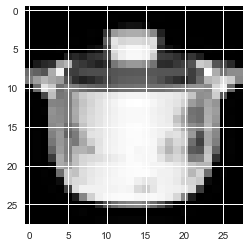

In [79]:
i = np.random.randint(0, high=100)
print('Picture # : ' + str(i))
p = Xtrain[i]
p_plot = plt.imshow(p)
print(len(Xtrain))
print(len(ytrain))
print("Label is : " + str(ytrain[i]))

In [74]:
print(training['images'][i])
print(training['annotations'][i])

{'url': ['http://d8.yihaodianimg.com/N00/M08/40/BE/CgMBmFOFj0iAVJx1AANNvGDJfC860700_600x600.jpg'], 'image_id': 64}
{'image_id': 64, 'label_id': 5}


[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0